In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Dense, Flatten

In [5]:
digits_datasets = keras.datasets.mnist

In [6]:
training_dataset, testing_dataset = digits_datasets.load_data()

In [8]:
training_data, training_labels = training_dataset
testing_data, testing_labels = testing_dataset


In [10]:
type(testing_labels)

numpy.ndarray

In [11]:
import matplotlib.pyplot as plt

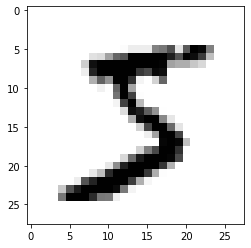

In [12]:
first_image = training_data[0]
plt.imshow(first_image, cmap = plt.cm.binary)

In [13]:
first_image.shape

(28, 28)

In [35]:
import numpy as np

In [37]:
first_image.max()

255

In [38]:
first_image.min()

0

In [39]:
from tensorflow.keras.utils import normalize

In [44]:
training_data = normalize(training_data)
testing_data = normalize(testing_data)

In [45]:
first_image = training_data[0]
first_image.max()

0.8164604414256631

# Model

In [46]:
model = Sequential()

In [48]:
model.add(Flatten())

In [49]:
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [53]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

In [56]:
model.fit(training_data, training_labels, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2612 - accuracy: 0.9231
Epoch 2/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1066 - accuracy: 0.9671
Epoch 3/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0739 - accuracy: 0.9768


In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [59]:
validation_loss, validation_accuracy = model.evaluate(testing_data, testing_labels)

10000/10000 [==============================] - 1s 55us/sample - loss: 45.5295 - accuracy: 0.9652


In [61]:
model.save('first ever model.model')

INFO:tensorflow:Assets written to: first ever model.model\assets


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('first ever model.model')

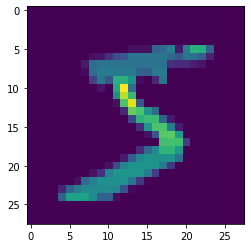

In [62]:
plt.imshow(first_image)

In [63]:
prediction = model.predict(training_data[:1])

In [64]:
prediction

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [65]:
np.argmax(prediction)

5